In [1]:
%reset -f
%reload_ext autoreload

# %load BCM_running.py

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import argparse
%matplotlib inline
from learning_plasticity import data_loader
from learning_plasticity import BCM_fully_connect_cl as BCM
# Reset tf.app.flags.FLAGS
tf.app.flags.FLAGS = tf.python.platform.flags._FlagValues()
tf.app.flags._global_parser = argparse.ArgumentParser()

from tensorflow.python.framework import ops
ops.reset_default_graph()


0.0964629426598549
-0.3712888658046722
-0.7612450122833252
-1.1507122516632080
-0.1374129652976990
0.5647036433219910
-1.0729166269302368
-0.2152086347341537
-1.5406684875488281
-0.4490845501422882
0.7202950119972229
-0.7607561349868774
-0.6051647663116455
-1.5411573648452759
1.8891856670379639
1.4219228029251099
0.8758863210678101
0.0964629426598549
1.2663314342498779
0.0186672750860453
0.5647036433219910
0.0186672750860453
-0.7617339491844177
-0.1369240731000900
-0.9941431283950806
-0.2930043041706085
-0.2930043041706085
0.2525431811809540
0.3303388655185699
-0.9946320652961731
-0.7607561349868774
0.7202950119972229
0.2525431811809540
1.0319665670394897
-0.4490845501422882
0.0181783754378557
1.1097623109817505
-0.4490845501422882
-1.4628727436065674
0.0186672750860453
-0.0596172958612442
-1.2289968729019165
-1.4628727436065674
-0.2930043041706085
-0.2925153970718384
-0.6051647663116455
-0.0591283962130547
-1.0729166269302368
0.4864191114902496
-0.1374129652976990
1.9728481769561768
0

TypeError: 'JointGrid' object is not subscriptable

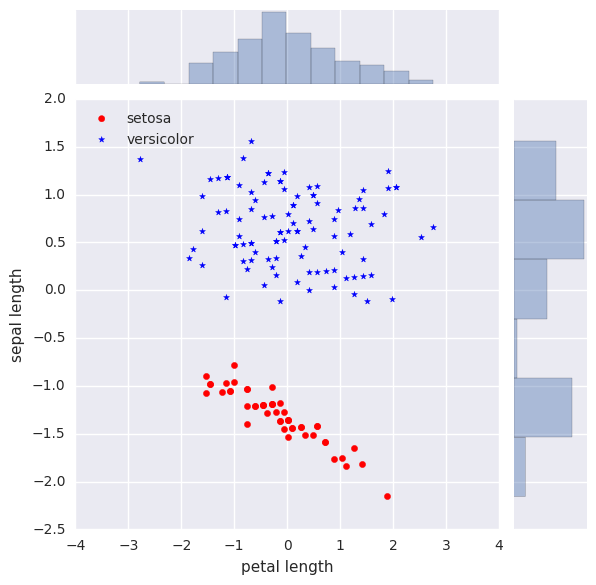

In [2]:
#data, data_w = data_loader.load_laplace(loc = 0, scale = 1, sample_size = 1000,dimension = 2,skew = False, whiten = True, rotation = True, iffigure = True)# Direct running of BCM in tf
data, data_w = data_loader.load_Iris()


n_output = 2
p = 2
tau = 200
batch = 1
nonlinear = 'ReLU'
obj_type = 'QBCM'
n_epoch = 1
decay = 0.01
eta = 0.0005

BCM_laplace = BCM.BCM_fully_connect(eta = eta, n_epoch = n_epoch, n_output = n_output, batch = batch, tau = tau, p = p, nonlinear = nonlinear, obj_type = obj_type, decay = decay, seed = None, random_state = None)
BCM_laplace.run_training(data)

plt.plot([0,data_w[0,0]], [0,data_w[0,1]],'k')
plt.plot([0,data_w[1,0]], [0,data_w[1,1]],'k')
g = plt.gca()
g.set_aspect(1)

plt.plot([0,BCM_laplace.final_w[0][0]], [0,BCM_laplace.final_w[0][1]],'r')
plt.plot([0,BCM_laplace.final_w[0][2]], [0,BCM_laplace.final_w[0][3]],'r')

BCM_laplace.final_w

In [26]:
exp_200 = tf.pow([1.5,2.3], [2, 2])
sess = tf.Session()
sess.run(exp_200)

array([ 2.25      ,  5.28999996], dtype=float32)

In [ ]:
% debug

> /usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/op_def_library.py(710)apply_op()
    706                               output_structure)
    707         else:
    708           return g.create_op(op_type_name, inputs, output_types, name=scope,
    709                              input_types=input_types, attrs=attr_protos,
--> 710                              op_def=op_def)

ipdb> up
> /usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/gen_state_ops.py(45)assign()
     43   result = _op_def_lib.apply_op("Assign", ref=ref, value=value,
     44                                 validate_shape=validate_shape,
---> 45                                 use_locking=use_locking, name=name)
     46   return result
     47 

ipdb> up
> /src/learning_plasticity/BCM_tf_cl.py(106)training()
    104         h = tf.exp(-1 / tau)
    105         new_thres = self.thresholds * h + tf.pow(self.outputs, self.p) * (1 - h)
--> 106         update_thres = tf.assign(self.thresholds,